# Overview

* The goal of this lab is to introduce the basic plotting and visualization functions that we will use throughout the semester.

* The main tool that we will use for plotting functions and data is matplotlib.  See https://matplotlib.org/stable/gallery/index.html for lots of example plots and code to create them.



In [ ]:
# We will import the modules that we need in the first cell
# so we don't have to run this part repeatedly

import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
# the following module is used to read in image files
from matplotlib import image
%matplotlib inline

# Warm Up - Functions

(5 points)

* Before moving on to plotting, we will do a warm up problem to practice making and using functions.


### The Modulo Operator

The modulo operator (%) returns the remainder of a division.  So if we enter:
```
10 % 2
```
we should get zero back.  Test this in the cell below, as well as

```
9 % 2
```

In [ ]:
# test modulo function here by printing the output for the two lines
print(10 % 2)
print(9 % 2)

0
1


Now write a function called **oddeven** that:
* takes in an integer
* prints out "that's odd..." if the number is odd
* prints out "even steven" if the number is even.
* returns a warning statement if the user enters something other than an integer.  For example:

```python
if type(n) != int:
  print('please enter an integer')
```



In [ ]:
# create your function here
def oddeven(n):
  if type(n) != int:
    print('please enter an integer')
  elif n % 2 == 0:
    print("even steven")
  else:
    print("that's odd...")

In [71]:
# test your function using an odd number as input
oddeven(3)

# test your function using an even number as input
oddeven(18)

oddeven(2.5)

that's odd...
even steven
please enter an integer


# Reading in data from a file and plotting it

(5 points)

- Here we will use **wget** to download a sample dataset, and we will read it in using np.loadtxt.  
- NOTE: When you see an exclamation point in front of a command, we are actually calling a linux command from within colab.

- The data file contains temperature and magnitude data for a sample of stars.  Magnitude is a weird astronomy units that measures how bright the star is.  A low value of magnitude is a brighter than a higher magnitude star.  Think of it as runners in a race - the first runner is fastest.

- The plot of magnitude versus temperature is called the **Hertzsprung-Russell** diagram, named after the two astronomers who first plotted star properties in this way.  Astronomers use the Hertzsprung-Russel diagram to categorize stars into the classes that tell us something about where the star is along its evolution from birth to death.

In [57]:
!wget http://www-personal.umich.edu/~mejn/cp/data/stars.txt

--2025-02-03 21:11:30--  http://www-personal.umich.edu/~mejn/cp/data/stars.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/stars.txt [following]
--2025-02-03 21:11:31--  https://public.websites.umich.edu/~mejn/cp/data/stars.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148507 (145K) [text/plain]
Saving to: ‘stars.txt.3’

stars.txt.3         100%[===================>] 145.03K   523KB/s    in 0.3s    

2025-02-03 21:11:31 (523 KB/s) - ‘stars.txt.3’ saved [148507/148507]



In [58]:
# check out the contents of your current directory using
!ls

 millikan.txt	  sample_data	     'SSCC_PS_Stair_tower-2 (1).jpg'   stars.txt.2
 millikan.txt.1   Siena_Obs_3.jpg     SSCC_PS_Stair_tower-2.jpg        stars.txt.3
 millikan.txt.2   Siena_Obs_3.jpg.1   stars.txt
 millikan.txt.3   Siena_Obs_3.jpg.2   stars.txt.1


In [59]:
star_data = np.loadtxt('stars.txt')
# set the first column equal to temp in Kelvin
temperature = star_data[:,0]

# set the second column equal to magnitude
magnitude = star_data[:,1]

--2025-02-03 21:13:33--  http://www-personal.umich.edu/~mejn/cp/data/stars.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/stars.txt [following]
--2025-02-03 21:13:33--  https://public.websites.umich.edu/~mejn/cp/data/stars.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148507 (145K) [text/plain]
Saving to: ‘stars.txt.5’

stars.txt.5         100%[===================>] 145.03K   649KB/s    in 0.2s    

2025-02-03 21:13:33 (649 KB/s) - ‘stars.txt.5’ saved [148507/148507]



Text(5000, 0, 'Giants')

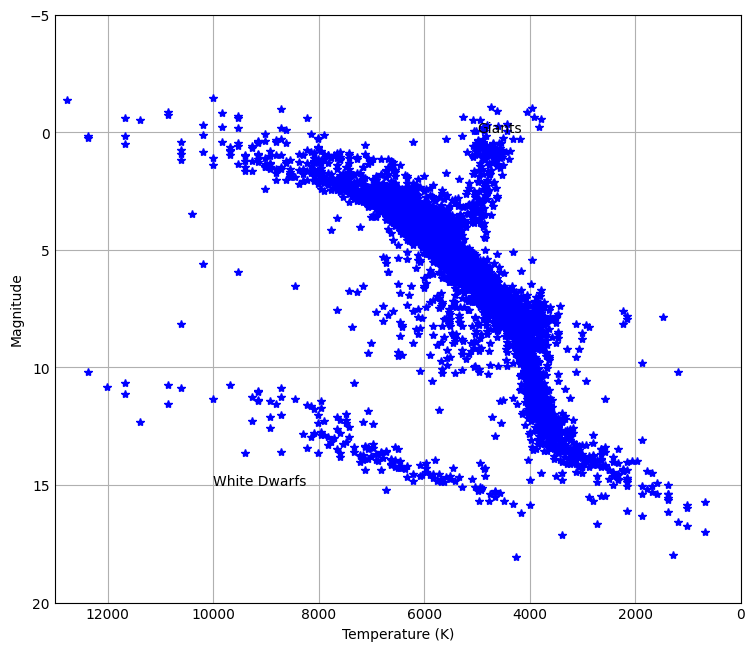

In [66]:
!wget http://www-personal.umich.edu/~mejn/cp/data/stars.txt

# open a figure
plt.figure(figsize=(7,6))

# use the plt.plot command to plot magnitude versus temperature
plt.plot(temperature,magnitude,'b*')

# set alpha to 0.2 so you can easily see the points
alpha=0.2

# limit the x range uto (0,13000) by using plt.xlim()
plt.xlim(0,13000)

# limit y range uto (-5,20) by using plt.ylim()
plt.ylim(-5,20)

# invert the x axis
ax = plt.gca()
ax.invert_xaxis()

# invert the y axis
ax.invert_yaxis()

plt.xlabel('Temperature (K)')
plt.ylabel('Magnitude')
plt.text(10000,15, "White Dwarfs")
plt.text(5000,0, "Giants")

Text(5000, 0, 'Giants')

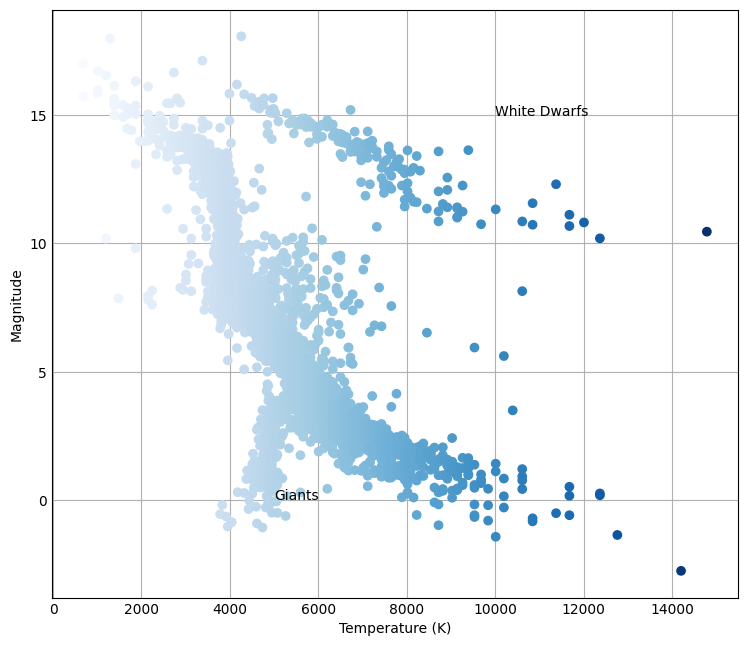

In [73]:
# plot again using the scatter plot command,
plt.figure(figsize=(7,6))
plt.scatter(temperature,magnitude,c=temperature) # Changed c-temp to c=temp
# invert the y axis
ax.invert_yaxis()
plt.xlabel('Temperature (K)')
plt.ylabel('Magnitude')
plt.text(10000,15, "White Dwarfs")
plt.text(5000,0, "Giants")
# color code by the temperature of the star
#note that c=mycolor is how you add color to the scatter plot

# Polar Plot

(5 points)

* Sometimes it's useful to visualize data using a polar plot.
* The following example is from https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

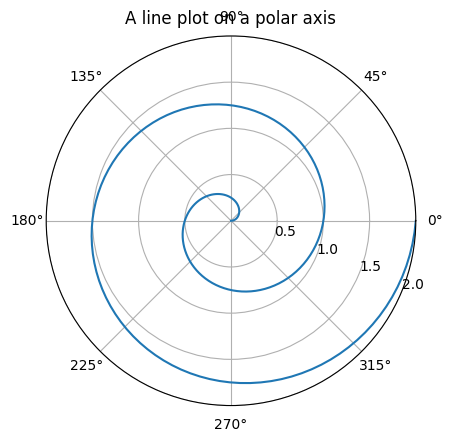

In [ ]:
# create an array of radial values, r, that range from 0 to 2 with 200 steps
r = np.linspace(0,2,200)

# create an array of angles, theta, that is 2*np.pi*r
theta = 2*np.pi*r

# the main plotting commands are in place below
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

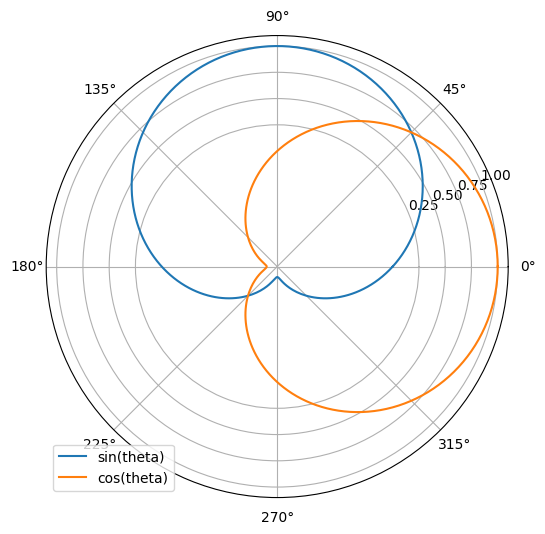

In [ ]:
# make another polar plot showing sine and cosine of theta
# let theta range from zero to 2 pi, with 200 steps

theta = np.linspace(0,2*np.pi,200)
r = np.sin(theta)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(6,6))

ax.plot(theta, r)

# enter code to plot cos(theta)

theta = np.linspace(0,2*np.pi,200)
r = np.cos(theta)

ax.plot(theta, r)

ax.set_rticks([0.25, .5, .75,1])  # Less radial ticks
ax.grid(True)

plt.legend(['sin(theta)','cos(theta)'])

# Displaying an image

(5 points)

We will use matplotlib's image module to display a jpg image.

In [ ]:
# here we are downloading an image from the web using the linux tool wget
# the exclamation point tells us that this is a linux command
!wget http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg

--2025-02-03 19:31:26--  http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg
Resolving www.envisionarchitects.com (www.envisionarchitects.com)... 205.134.241.102
Connecting to www.envisionarchitects.com (www.envisionarchitects.com)|205.134.241.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271505 (265K) [image/jpeg]
Saving to: ‘Siena_Obs_3.jpg.1’

Siena_Obs_3.jpg.1   100%[===================>] 265.14K  --.-KB/s    in 0.03s   

2025-02-03 19:31:26 (8.82 MB/s) - ‘Siena_Obs_3.jpg.1’ saved [271505/271505]



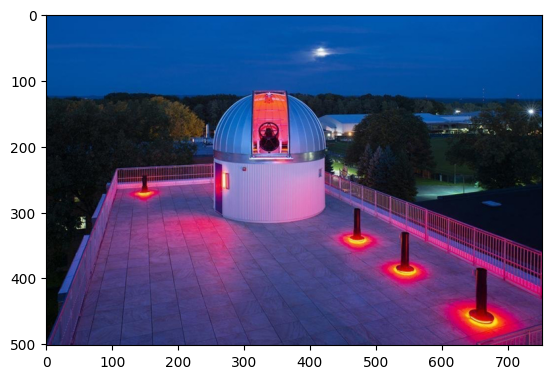

In [ ]:
# we will use the image reader from matplotlib
# (there are other options - feel free to google)
# enter the image name below
myimage = image.imread("Siena_Obs_3.jpg")

plt.imshow(myimage)

### Display another image
Select another image to plot.  You can download the image from the web, or upload an image to your drive folder.  Or take a selfie!

To upload an image from your computer, type the following in a separate cell to start an interactive dialog where you can select your image.

```python
from google.colab import files
uploaded = files.upload()
```

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SSCC_PS_Stair_tower-2.jpg to SSCC_PS_Stair_tower-2 (1).jpg


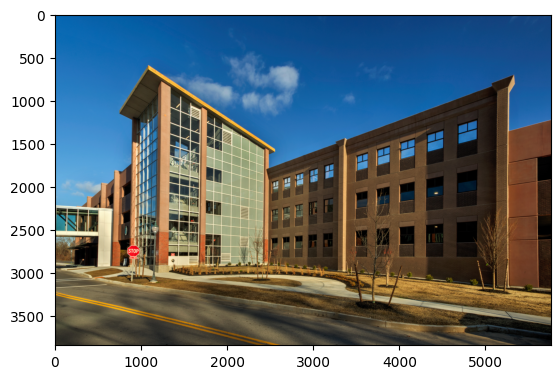

In [ ]:
# code to plot your second image here
myimage = image.imread("SSCC_PS_Stair_tower-2.jpg")

plt.imshow(myimage)

# Fitting a Straight Line to Data (Adapted from Newman Problem 3.8)

(5 points)

* download the datafile millikan.txt from http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
* This is historic data from Rober Millikan that measured the photoelectric effect.
* Read in the data using np.loadtxt
  * the first colum is the frequence $\nu$ in hertz
  * the second column is the voltage $V$ in volts.
* Fit a line to the data using np.polyfit
```python
c = np.polyfit(x,y,1)
```

* Plot the best-fit line with the data. The following should be useful:
```python
xline = np.linspace(xmin,xmax,100)
yline = np.polyval(c,xline)
```

* The physical equation that determines the best-fit line is
$$V = \frac{h}{e} \nu - \phi $$
where
  * V is the voltage of the ejected electron
  * $\nu$ is the frequency of the light that shines on the metal
  * $\phi$ is the amount of energy needed to remove the electron from the metal, also known as the work function.
  * $h$ is Planck's constant
  * $e=1.6 \times 10^{-19}$ C is the charge of the electron in Coulombs.

* From your best fit slope and intercept, determine the values of the work function and Planck's constant.



In [77]:
# enter your code here
!wget http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
data = np.loadtxt('millikan.txt')

freq = data[:,0]
volt = data[:,1]
h = 6.626*10**-34
e = 1.6*10**-19
workfunction = (h/e)*freq - volt



--2025-02-03 21:21:50--  http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/millikan.txt [following]
--2025-02-03 21:21:50--  https://public.websites.umich.edu/~mejn/cp/data/millikan.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108 [text/plain]
Saving to: ‘millikan.txt.7’

millikan.txt.7      100%[===================>]     108  --.-KB/s    in 0s      

2025-02-03 21:21:51 (32.2 MB/s) - ‘millikan.txt.7’ saved [108/108]



6.541163773628013e-34
1.7312358039813522


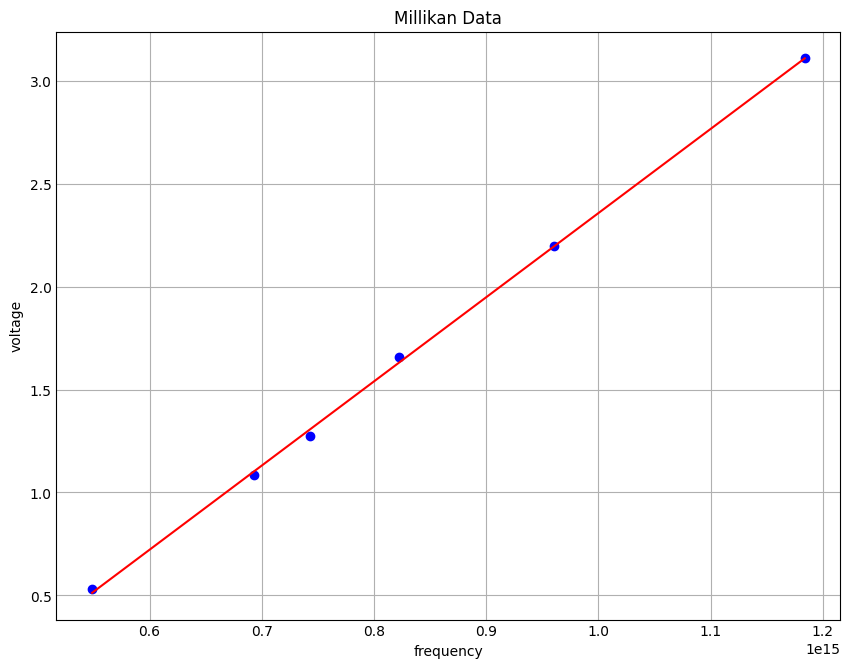

In [86]:
plt.figure(figsize=(8,6))
# Plot the values
plt.plot(freq,volt,"bo")
plt.xlabel('frequency')
plt.ylabel('voltage')
plt.title('Millikan Data')
#plt.show()
c = np.polyfit(freq,volt,1)
xline = np.linspace(min(freq),max(freq),100)
yline = np.polyval(c,xline)
# then develop the code
plt.plot(xline,yline,'r-')

print(c[0]*1.6e-19)
print(c[1]*-1)

# Histogram of Data

(5 points)

* Histograms are useful for looking at the distribution of values for one particular quantity.
* In this problem, we will generate 100 random values that are drawn from a Gaussian distribution, and we will then plot the values in a histogram.
* We will then calculate the average and standard deviation, and show these values on the graph.

* Read through the output from help - what do you expect the mean and standard deviation to be?

In [ ]:
# explore the function using help
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
     

average value = -0.08
the STD = 0.98


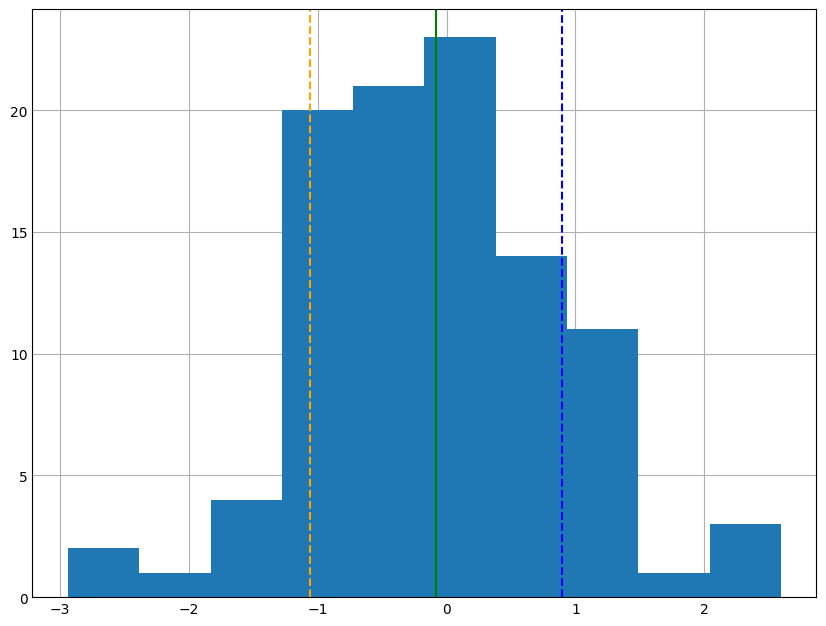

In [ ]:
plt.figure(figsize=(8,6))

gauss_values = np.random.normal(size=100)
plt.hist(gauss_values)
print("average value = {:.2f}".format(np.mean(gauss_values)))
print("the STD = {:.2f}".format(np.std(gauss_values)))

# add code to plot a solid vertical line at the average
# you can pick the color, but it should be different from the histogram
# use plt.axvline()
plt.axvline(np.mean(gauss_values), color='green')
# add code to plot dotted vertical lines at
# you can pick the color, but it should be different from the histogram
# average + std
# average - std
plt.axvline(np.mean(gauss_values)-np.std(gauss_values), color='orange', linestyle='dashed')
plt.axvline(np.mean(gauss_values)+np.std(gauss_values), color='blue', linestyle='dashed')
# once your figure is set, try increasing the sample size
# what happens to the mean and std as the sample size increases?

# Multipanel Plot

(5 points)
* create a plot with 4 panel - two columns and two rows.  You can call the top plot using plt.subplot(nrow,ncol,nplot), or
```python
plt.subplot(2,2,1)
```
* plot $sin(\theta)$ vs. $\theta$ in the first panel.
* plot $cos(\theta)$ vs. $\theta$ in the second panel.
* plot $tan(\theta)$ vs. $\theta$ in the third panel.
* plot all three functions together in the fourth panel.
* use np.cos, np.sin, np.tan

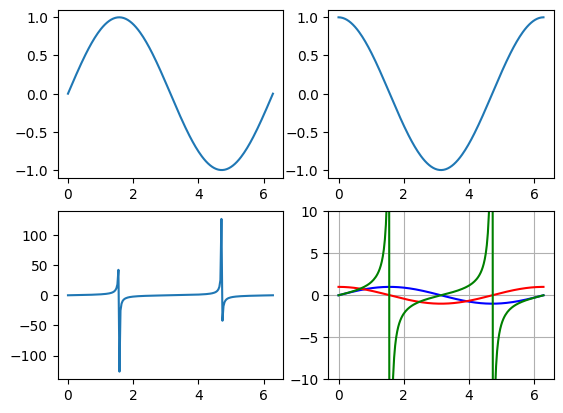

In [ ]:
# Your code here
plt.subplot(2,2,1)
plt.plot(theta,np.sin(theta))

plt.subplot(2,2,2)
plt.plot(theta,np.cos(theta))

plt.subplot(2,2,3)
plt.plot(theta,np.tan(theta))

plt.subplot(2, 2, 4)
plt.plot(theta, np.sin(theta), label='sin(θ)', color='blue')
plt.plot(theta, np.cos(theta), label='cos(θ)', color='red')
plt.plot(theta, np.tan(theta), label='tan(θ)', color='green')
plt.ylim(-10, 10)
plt.grid(True)

# 3D Plots

(5 points)

* Below is an example of a 3D plot, just for future reference.
* You don't need to add anything except a title that indicates some physical situation where this type of motion could arise.
*NOTE: if you run this cell on your own installation of notebook, you will be able to move the plot around to view it from different angles.

Text(0.5, 0.92, 'Charge Through a Magnetic Field 3D Plot')

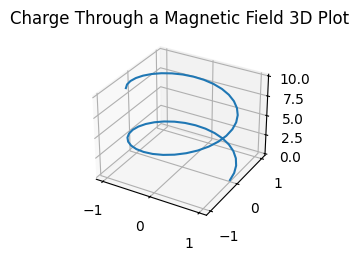

In [50]:
fig = plt.figure()

# keeping the projection = 3d
# ctreates the 3d plot
ax = plt.axes(projection = '3d')
time = np.linspace(0,10)
x = np.cos(time)
y = np.sin(time)
plt.plot(x,y,time)

# add your title here!
plt.title('Charge Through a Magnetic Field 3D Plot')

# One final plot of your choice

(5 points)

* Check out the Examples and Tutorials on the [matplotlib website](https://matplotlib.org/stable/index.html).
* Select a plot that you like and replicate the code here.

Text(0.5, 0, 'z-label')

<Figure size 800x600 with 0 Axes>

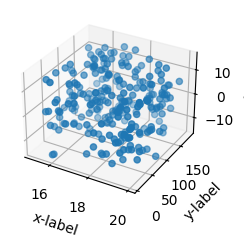

In [88]:
plt.figure(figsize=(8,6))
plt.style.use('_mpl-gallery')

# Make data
np.random.seed(23212312)
n = 250

rng = np.random.default_rng()
x = rng.uniform(15, 20, n)
y = rng.uniform(5, 185, n)
z = rng.uniform(-15, 15, n)

# Plot the data
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z)
ax.set_xlabel('x-label')
ax.set_ylabel('y-label')
ax.set_zlabel('z-label')

# Summarizing What Your Learning and Saving Your Work

* Save your notebook to github.
* On your wiki, create a summary page of the important points covered in this lab.
* This should be similar to the reference cheat-sheets, rather than a paragraph summary. So include code snippets and explanatory text.
